# Analysis of Production Model and Conclusions

In [1]:
#Importing our libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import pickle

In [2]:
#Reading in our production model + the next two top models

with open('../models/stacked_production_model.pkl', 'rb') as f:
    model = pickle.load(f) 
    
with open('../models/xgb_encore_model.pkl', 'rb') as f:
    model_2 = pickle.load(f) 
    
with open('../models/xgb_model.pkl', 'rb') as f:
    model_3 = pickle.load(f)

In [3]:
# Our dataframes
brass = pd.read_csv('../data/brass_churn.csv') #our original joined dataframe containing the `churn` column

brass_v2 = pd.read_csv('../data/brass_v2.csv') #our cleaned dataframe containing the feature engineered columns

results_table = pd.read_csv('../data/results_table.csv') #our results dataframe

In [4]:
results_table.head(2)

,Unnamed: 0,train_accuracy,test_accuracy,train_bal_accuracy,test_bal_accuracy,train_recall,test_recall,train_geom_mean,test_geom_mean,train_fbeta,test_fbeta
0,Logistic Regression,0.802871,0.796875,0.535152,0.515957,0.072727,0.031915,0.463372,0.432779,0.753723,0.741797
1,Random Forest,1.000000,0.924107,1.000000,0.838683,1.000000,0.691489,1.000000,0.834321,1.000000,0.920558


In [5]:
# Renaming the 'Unnamed: 0' column
results_table.rename(columns = {'Unnamed: 0': 'Models'}, inplace=True)
results_table.head(2)

,Models,train_accuracy,test_accuracy,train_bal_accuracy,test_bal_accuracy,train_recall,test_recall,train_geom_mean,test_geom_mean,train_fbeta,test_fbeta
0,Logistic Regression,0.802871,0.796875,0.535152,0.515957,0.072727,0.031915,0.463372,0.432779,0.753723,0.741797
1,Random Forest,1.000000,0.924107,1.000000,0.838683,1.000000,0.691489,1.000000,0.834321,1.000000,0.920558


For some of the operations I'll perform in this notebook, I need the scaled train and test dataframes, as well as the target features in the train and test datasets obtained from the `brass_v2` dataset. So I am going to repeat same operations from last notebook below. Since I used a random seed in the previous notebook, I expect the outputs to be the same. 

In [6]:
#feature matrix
X = brass_v2.drop(columns = ['id', 'churn', 'industry', 'registration_type'])  #also dropping churn for the feature matrix because it is the target

#Target
y = brass_v2['churn']

#Splitting into train and test sets with a train size of 0.7 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Instantiate StandardScaler
ss = StandardScaler()

Z_train = ss.fit_transform(X_train)

Z_test = ss.transform(X_test)

#I'll like the transformed data to be in a dataframe - not compulsory though

Z_train = pd.DataFrame(Z_train, columns=X_train.columns, index=X_train.index)

Z_test = pd.DataFrame(Z_test, columns=X_test.columns, index=X_test.index)

#Checking - if it is same as in other notebook. it is!
Z_test.head(2)


,is_high_value,avg_ledger_bal,cred_count_ratio,deb_count_ratio,avg_cred_amnt,avg_deb_amnt,avg_cred_ratio,avg_deb_ratio,coeff_var
1348,-0.381881,-0.092138,-0.097397,-0.088355,-0.149827,-0.158730,-0.100001,-0.049964,-0.209331
298,-0.381881,-0.091824,-0.099916,-0.090592,-0.148760,-0.151744,-0.100921,-0.050074,0.207962


# Examining the production model¶

## Check out our top 5 models

In [8]:
results_table.sort_values(by='test_recall', inplace=True, ascending=False) #sorting from best to least based on recall score


top_5 = results_table.head()  #the top 5 

top_5

,Models,train_accuracy,test_accuracy,train_bal_accuracy,test_bal_accuracy,train_recall,test_recall,train_geom_mean,test_geom_mean,train_fbeta,test_fbeta
13,Stacked Encore,0.966507,0.937500,0.948788,0.894038,0.918182,0.819149,0.948622,0.892981,0.966490,0.936971
12,XGBoost Encore,0.989474,0.935268,0.981667,0.861372,0.968182,0.734043,0.981636,0.858196,0.989454,0.932632
7,XGBoost,1.000000,0.926339,1.000000,0.847908,1.000000,0.712766,1.000000,0.844273,1.000000,0.923454
9,Stacked Classifier,0.969378,0.926339,0.972273,0.847908,0.977273,0.712766,0.972268,0.844273,0.969554,0.923454
8,Bagging Classifier,0.992344,0.924107,0.983485,0.842589,0.968182,0.702128,0.983445,0.838637,0.992309,0.920964


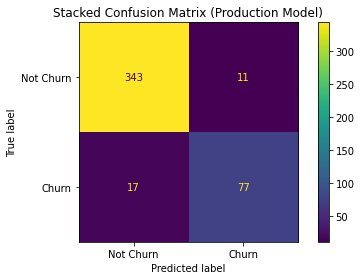

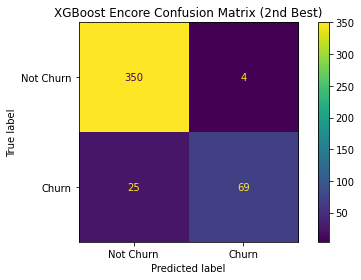

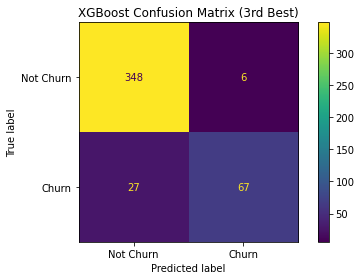

In [9]:
# Confusion matrices of the top 3 models

ConfusionMatrixDisplay.from_estimator(model, Z_test, y_test, display_labels=['Not Churn', 'Churn'])
plt.title(f'Stacked Confusion Matrix (Production Model)');
plt.tight_layout();
plt.savefig('../images/Stacked_Confusion_Matrix.png', dpi=300)

ConfusionMatrixDisplay.from_estimator(model_2, Z_test, y_test, display_labels=['Not Churn', 'Churn'])
plt.title(f'XGBoost Encore Confusion Matrix (2nd Best)');
plt.tight_layout();
plt.savefig('../images/XGBoost_Encore_Matrix.png', dpi=300)

ConfusionMatrixDisplay.from_estimator(model_3, Z_test, y_test, display_labels=['Not Churn', 'Churn'])
plt.title(f'XGBoost Confusion Matrix (3rd Best)');
plt.tight_layout();
plt.savefig('../images/XGBoost_Matrix.png', dpi=300);

# What does our top model get right?

Consider the metrics of our stacked encore (production model) as displayed in the `top_5` dataframe and the confusion matrix above:

1. A balanced accuracy of 89% -- this is 3% more than the balanced accuracy of the next best model. It indicates that the production model is performing just as well for both positive and negative classes.

2. A recall of 82% -- this is almost 10% more than the next best recall score. That's a masive improvement, and it indicates that our model is doing better at minimizing false negatives which is exactly what we need. 

3. An accuracy of 94% -- even though this was not our priority in this project, it is useful to observe that our model is 15% more accurate than the null model. Despite the inbalanced nature of the classes, this is a major improvement in accuracy.

4. A geometric mean of almost 90% -- Now remember that the geometric mean is a measure of the balance in the classification performances in both the positive and negative classes, which means that it is low if the model is doing great in predicting the majority class but not the minority one. Hence, such a high score means our model is also great at predicting minority class.

5. Crucially, consider the third quadrant of the confusion matrix. This model is only incorrectly classifying 17 churned customers as not churned. Compare that to the figure for the next closest model - which is 25. It is relevant to point out that there is a tradeoff here. If you look at the first quadrants of the various confusion matrices, you will notice that our production model is predicting that 11 customers who have not churned have actually churned. Our second best model is doing better in that regard - it is only wrongly predicting 4 of those. However we can accept that trade because we are more interested here in correctly predicting churn. 

# Plotting Top 5 model on the basis of recall and balanced accuracy

In [10]:
# a stripped version of the top 5 frame containing only the recall and balanced accuracy scores

top_5_stripped = top_5.drop(columns = ['train_accuracy', 'test_geom_mean', 'train_bal_accuracy', 
                                                      'train_recall', 'train_geom_mean', 'train_fbeta', 'test_accuracy', 
                                                      'test_fbeta'])

top_5_stripped                      

,Models,test_bal_accuracy,test_recall
13,Stacked Encore,0.894038,0.819149
12,XGBoost Encore,0.861372,0.734043
7,XGBoost,0.847908,0.712766
9,Stacked Classifier,0.847908,0.712766
8,Bagging Classifier,0.842589,0.702128


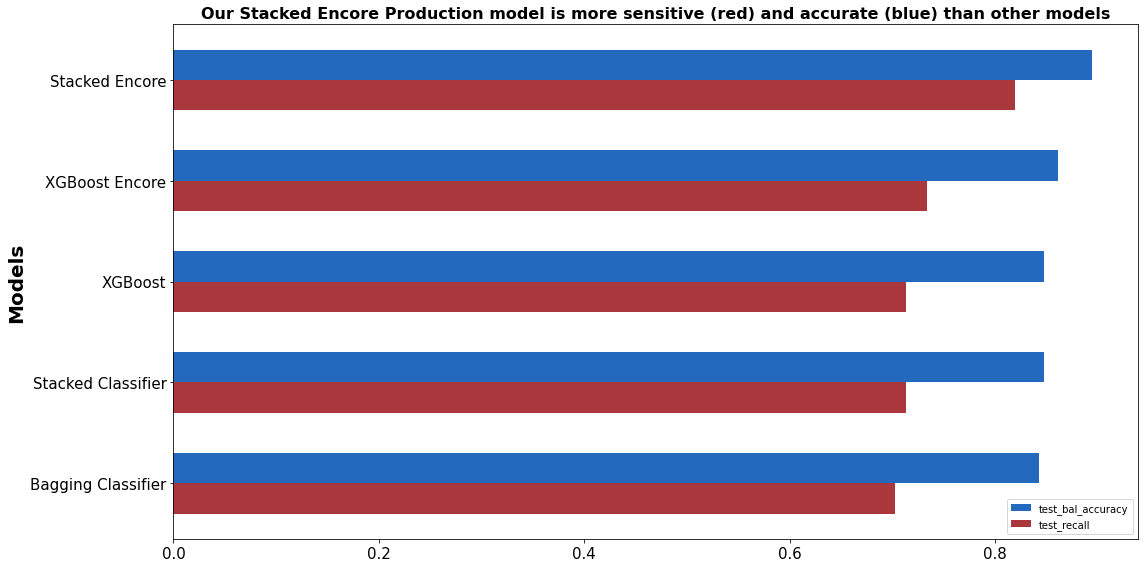

In [11]:
#Bar plot

p = top_5_stripped.plot(x = 'Models',
                   kind='barh', 
                   stacked=False, 
                   figsize=(16,8), 
                   fontsize=15, width = 0.6, colormap='vlag')

p.invert_yaxis()
plt.legend(loc='lower right')
plt.title('Our Stacked Encore Production model is more sensitive (red) and accurate (blue) than other models', size=16, fontweight='bold')
plt.ylabel('Models', size=20, fontweight='bold'),
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig('../images/top_models.png', dpi=300);

# What does our top model NOT get right?

I am going to create a dataframe that contains the misclassified targets in the dataframe, and then I'll analyse it.

## Number of misclassified
We already know this from the confusion matrix but i want to create a dataframe to manipulate.

In [12]:
df = pd.DataFrame() #an empty dataframe
df.index = list(X_test.index) #making the index of the dataframe same as the index in the test dataframe
df['predictions'] = model.predict(Z_test) #a `predictions` column that contains what our model predicted for that index
df['true_values'] = list(y_test) #a `true_values` column that contains the actual value for that index

misclassified = df[df['predictions'] != df['true_values']] #obtaining the rows where actual values and predictions were different

print(f'Our model misclassifies {misclassified.shape[0]} customers')

Our model misclassifies 28 customers


In [13]:
brass_v2.head()

,id,registration_type,industry,is_high_value,avg_ledger_bal,cred_count_ratio,deb_count_ratio,avg_cred_amnt,avg_deb_amnt,avg_cred_ratio,avg_deb_ratio,coeff_var,churn
0,21,Enterprise,General Services,0,5.000000e+01,0.005917,0.005917,1.000000e+02,100.000000,0.591716,0.591716,0.000000,0
1,122,Limited Liability,Technology,0,1.000000e+04,0.003831,0.003831,2.000000e+04,12000.000000,76.628352,45.977011,1.414214,1
2,159,Sole Proprietorship,Technology,1,2.122603e+06,0.037344,0.265560,2.549667e+06,357016.828281,10579.529737,1481.397628,1.229588,0
3,217,Limited Liability,Digital Services,0,6.500000e+03,0.004545,0.004545,1.300000e+04,12000.000000,59.090909,54.545455,1.414214,1
4,323,Sole Proprietorship,Others,0,1.974115e+04,0.084337,0.309237,1.131905e+04,3036.036494,45.458023,12.192918,0.815543,0


In [14]:
#merge the misclassified df with brass_v2

#joining on index and dropping churn because we already have it in the `misclassified` df

misclassified = misclassified.merge(brass_v2, left_index=True, right_index=True).drop(columns=['churn']) 

In [15]:
#checking
misclassified.head(2)

,predictions,true_values,id,registration_type,industry,is_high_value,avg_ledger_bal,cred_count_ratio,deb_count_ratio,avg_cred_amnt,avg_deb_amnt,avg_cred_ratio,avg_deb_ratio,coeff_var
289,0,1,7320,Enterprise,Restaurant and Food,0,41889.29434,0.016556,0.158940,63650.0,6629.303125,210.761589,21.951335,1.164228
502,0,1,12960,Enterprise,General Services,0,68.85000,0.039062,0.039062,110.0,98.075000,0.429688,0.383105,1.787367


## Average ledger balance of misclassified customers

In [16]:
#these are the customers our model is wrongly predicting as not churned (nc) when they have truly churned
misclassified_nc = misclassified[misclassified['predictions'] == 0]

In [17]:
#The average ledger balance of those who have churned but were predicted as not churned
misclassified_nc_balance = (misclassified_nc.groupby('id')['avg_ledger_bal'].mean()).mean()
misclassified_nc_balance

112998.92892209403

In [18]:
#these are the customers our model is wrongly predicting as churned (c) when they have not churned
misclassified_c = misclassified[misclassified['predictions'] == 1]

In [19]:
#The average ledger balance of those who have not churned but were predicted as churned
misclassified_c_balance = (misclassified_c.groupby('id')['avg_ledger_bal'].mean()).mean()
misclassified_c_balance

6804.04656168831

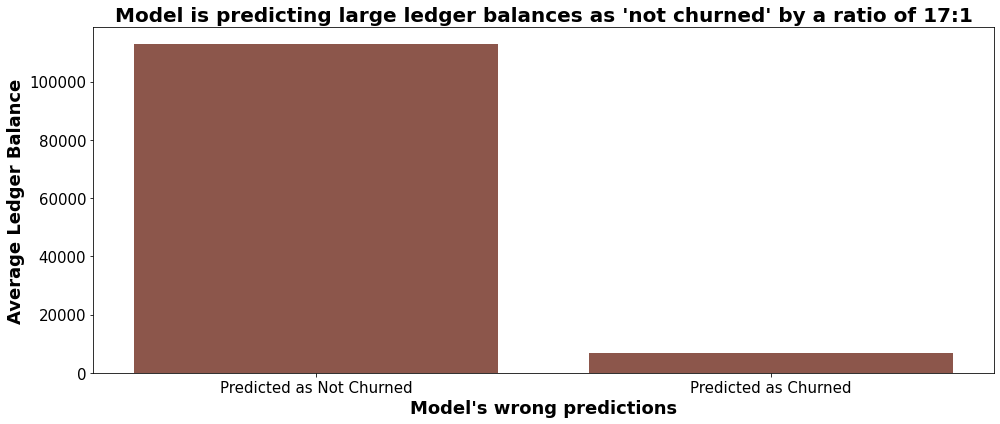

In [29]:
plt.figure(figsize = (14,6))
plt.bar(x = ['Predicted as Not Churned', 'Predicted as Churned'], height= [misclassified_nc_balance, misclassified_c_balance], color='tab:brown')
plt.ylabel('Average Ledger Balance', fontdict={'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel("Model's wrong predictions", fontdict={'fontsize': 18, 'fontweight': 'bold'})
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.title("Model is predicting large ledger balances as 'not churned' by a ratio of 17:1", size = 20, fontweight='bold')
plt.tight_layout()
plt.savefig('../images/balance_predictions.png', dpi=300);

Of the customers who were misclassified, those who have churned but who had high average ledger balances when they were still customers are being wrongly classified as 'not churned'. However misclassified customers predicted to have churned have much lower ledger balanes. The gulf in the average ledger balances between these two groups is about 17:1. 

This gulf is not because our production model is discriminating against less wealthy customers `:)`, but rather it appears that there is an element of sensitivity to outliers. Consider this customer below who our model incorrectly predicted as not having churned. 
- The last transaction in its account was 205 days before the end of our dataset period. 
- For the entire duration of its time with the bank - between April and June - there were only 7 transactions in the account, out of which only two were credit transactions. However one of those transactions was for 2.5 million. This clearly gives it a very high average ledger balance. And because most cistomers with that kind of average balance are high value customers who have not left the bank, it makes sense that it is being misclassified. 

In [21]:
brass[brass['id'] == 12139]

,id,registration_type,industry,transaction_type,amount,ledger_balance,available_balance,date,difference,churn
136183,12139,Enterprise,Logistics,credit,2050.00,0.00,0.00,2022-04-12,264,1
136184,12139,Enterprise,Logistics,credit,2500000.00,2050.00,2050.00,2022-04-16,260,1
136185,12139,Enterprise,Logistics,debit,2500000.00,2502050.00,2050.00,2022-05-20,226,1
136186,12139,Enterprise,Logistics,debit,53.75,2502050.00,2050.00,2022-05-20,226,1
136187,12139,Enterprise,Logistics,debit,1625.00,1996.25,1996.25,2022-06-01,214,1
136188,12139,Enterprise,Logistics,debit,1625.00,1996.25,1996.25,2022-06-10,205,1
136189,12139,Enterprise,Logistics,credit,1625.00,371.25,371.25,2022-06-10,205,1


I also noticed some fringe cases that even though the model called incorrectly, it is hard to argue against the model's recommendations. The first customer below (`id == 6657`) has not churned based on our cutoff, but notice that the last time there was a transaction on the account, it was exactly 184 days ago (which is the cutoff). If we had run this one day later, this customer would have been classified as churn. In addition, the transaction on that day was for 1 naira, possibly a bank charge. Prior to that 1 naira charge, the last transaction was 205 days ago which qualifies customer as churn. 

Same thing with the second customer below (`id == 10034`). Last transaction was exactly 184 days ago and it was for just 4 naira, also possibly a bank charge. And the last transaction before that was 201 days ago which also qualifies as churn. So even though our model was misclassifiying these customers based on our metrics, it seems to be seeing something that indicates churn. 

In [33]:
brass[brass['id'] == 6657]

,id,registration_type,industry,transaction_type,amount,ledger_balance,available_balance,date,difference,churn
55780,6657,Enterprise,General Services,credit,180.00,0.00,0.00,2022-02-10,325,0
55781,6657,Enterprise,General Services,debit,1000.00,2180.00,1180.00,2022-02-11,324,0
55782,6657,Enterprise,General Services,debit,10.75,2180.00,1180.00,2022-02-11,324,0
55783,6657,Enterprise,General Services,credit,2000.00,180.00,180.00,2022-02-11,324,0
55784,6657,Enterprise,General Services,debit,1000.00,1169.25,169.25,2022-06-10,205,0
55785,6657,Enterprise,General Services,debit,10.75,1169.25,169.25,2022-06-10,205,0
55786,6657,Enterprise,General Services,debit,1.00,158.50,158.50,2022-07-01,184,0


In [36]:
brass[brass['id'] == 10034]

,id,registration_type,industry,transaction_type,amount,ledger_balance,available_balance,date,difference,churn
103629,10034,Limited Liability,Agriculture,debit,12000.00,17000.00,17000.00,2022-04-03,273,0
103630,10034,Limited Liability,Agriculture,credit,17000.00,0.00,0.00,2022-04-03,273,0
103631,10034,Limited Liability,Agriculture,debit,5000.00,5000.00,0.00,2022-06-14,201,0
103632,10034,Limited Liability,Agriculture,debit,4970.00,5000.00,30.00,2022-06-14,201,0
103633,10034,Limited Liability,Agriculture,debit,10.75,5000.00,30.00,2022-06-14,201,0
103634,10034,Limited Liability,Agriculture,credit,5000.00,0.00,0.00,2022-06-14,201,0
103635,10034,Limited Liability,Agriculture,debit,4.00,19.25,19.25,2022-07-01,184,0


There were a few other instances like this among the model's false positives. Like I have emphasized throughout the project, false positives are more acceptable for us. And considering that several of our model's false positives are actually close to becoming true positives (as shown above), this is not a bad scenario.

# Conclusions

For every business, the less churn you have, the better. So being able to calculate and predict churn is crucial, not just because it is cheaper to retain old customers than to attract new ones, but also because it is a measure of customer satisfaction. 

In this project I set out:

- To train a classifier that can predict customer churn for Brass. 

This was successfully done. Our production model had a balanced accuracy of 89%, indicating that it was performing just as well for both positive and negative classes; a recall of 82%, indicating that it was doing well at minimizing false negatives which is exactly what I wanted; an accuracy of 94% , which is 15% more accurate than the null model etc. The model was only incorrectly classifying 17 churned customers as 'not churned', a 32% improvement compared to our next closest model which was incorrectly classifying 25 churned customers as 'not churned'.

- To define churn for Brass - using the data provided by the company. 

In the data provided, Brass did not label any customer as churned or not churned. I successfully defined churn using the 75th percentile of time difference between the most recent transactions per customer and the end of the year (which was the end of our dataset). 

- To engineer features that will be used in predicting churn. Brass was unable to share much demographic data due to security concerns about sharing customer information with me as a non-staff who is not physically on site. 

This was also done as explained earlier, with the feature engineering of 11 new features (reduced to 9) which was used for our modeling to good effect.

## Going forward:

- I recommend that the model be continuously fine-tuned with more data because the one year of the data is not sufficient considering a churn cutoff of 184 days.

- Internally, Brass could also strengthen the model by adding some more features that it was unable to share with me due to security concerns.

- In terms of its internal marketing and customer retention strategies, Brass has to look into means of eliciting more frequent use of accounts by customers. As stated earlier, the average number of days between the most recent transactions per customer and the end of the year was 107 days. If customers stay too long between transactions, it means they have preferred alternatives, and churn becomes easier.